In [167]:
import konlpy
import gensim
import sklearn
import seaborn

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

from tqdm import tqdm
from konlpy.tag import Okt
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from numpy.linalg import norm
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

0.5.2
4.1.2
1.0
0.11.2


### 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [152]:
def read_token(file_name):
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line:
                break
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:  # 필요 시 Adjective, Verb 추가
                    result.append(word[0])
    return ' '.join(result)

모든 영화의 Word Embedding을 구하기 위한 토큰화

In [148]:
okt = Okt()
all_sys_tok = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        all_sys_tok.append(res)

21개 장르마다의 영화의 각각의 Word Embedding을 구하기 위한 토큰화

In [106]:
okt = Okt()

genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [107]:
genre = []
for file_name in tqdm(genre_txt):
    genre.append(read_token(file_name))

  0%|          | 0/21 [00:00<?, ?it/s]

synopsis_SF.txt 파일을 읽고 있습니다.


  5%|▍         | 1/21 [00:11<03:53, 11.68s/it]

synopsis_family.txt 파일을 읽고 있습니다.


 10%|▉         | 2/21 [00:16<02:20,  7.41s/it]

synopsis_show.txt 파일을 읽고 있습니다.


 14%|█▍        | 3/21 [00:20<01:48,  6.03s/it]

synopsis_horror.txt 파일을 읽고 있습니다.


 19%|█▉        | 4/21 [00:51<04:29, 15.83s/it]

synopsis_etc.txt 파일을 읽고 있습니다.


 24%|██▍       | 5/21 [01:18<05:16, 19.75s/it]

synopsis_documentary.txt 파일을 읽고 있습니다.


 29%|██▊       | 6/21 [02:42<10:26, 41.78s/it]

synopsis_drama.txt 파일을 읽고 있습니다.


 33%|███▎      | 7/21 [06:05<22:00, 94.34s/it]

synopsis_romance.txt 파일을 읽고 있습니다.


 38%|███▊      | 8/21 [06:58<17:37, 81.35s/it]

synopsis_musical.txt 파일을 읽고 있습니다.


 43%|████▎     | 9/21 [07:00<11:17, 56.48s/it]

synopsis_mystery.txt 파일을 읽고 있습니다.


 48%|████▊     | 10/21 [07:08<07:36, 41.54s/it]

synopsis_crime.txt 파일을 읽고 있습니다.


 52%|█████▏    | 11/21 [07:23<05:32, 33.29s/it]

synopsis_historical.txt 파일을 읽고 있습니다.


 57%|█████▋    | 12/21 [07:24<03:33, 23.69s/it]

synopsis_western.txt 파일을 읽고 있습니다.


 62%|██████▏   | 13/21 [07:25<02:13, 16.66s/it]

synopsis_adult.txt 파일을 읽고 있습니다.


 67%|██████▋   | 14/21 [07:51<02:15, 19.39s/it]

synopsis_thriller.txt 파일을 읽고 있습니다.


 71%|███████▏  | 15/21 [08:13<02:01, 20.22s/it]

synopsis_animation.txt 파일을 읽고 있습니다.


 76%|███████▌  | 16/21 [09:20<02:52, 34.49s/it]

synopsis_action.txt 파일을 읽고 있습니다.


 81%|████████  | 17/21 [10:17<02:45, 41.31s/it]

synopsis_adventure.txt 파일을 읽고 있습니다.


 86%|████████▌ | 18/21 [10:23<01:31, 30.41s/it]

synopsis_war.txt 파일을 읽고 있습니다.


 90%|█████████ | 19/21 [10:27<00:45, 22.61s/it]

synopsis_comedy.txt 파일을 읽고 있습니다.


 95%|█████████▌| 20/21 [11:22<00:32, 32.42s/it]

synopsis_fantasy.txt 파일을 읽고 있습니다.


100%|██████████| 21/21 [11:29<00:00, 32.81s/it]


### 2. 추출된 결과로 embedding model 만들기

모든 영화 토큰으로 임베딩 모델 만들기

In [149]:
all_model = Word2Vec(all_sys_tok, vector_size=100, window=5, min_count=3, sg=0)  
all_model.wv.most_similar(positive=['영화'])

[('작품', 0.8847050666809082),
 ('다큐멘터리', 0.8528751730918884),
 ('드라마', 0.8101059794425964),
 ('영화로', 0.8021345138549805),
 ('코미디', 0.7841187715530396),
 ('주제', 0.7798399329185486),
 ('형식', 0.7708330750465393),
 ('실화', 0.7545601725578308),
 ('소재', 0.7524188160896301),
 ('소설', 0.7513124942779541)]

In [153]:
all_model.wv.most_similar(positive=['시간'])

[('지나', 0.7133775353431702),
 ('동안', 0.7091637849807739),
 ('세월', 0.702455461025238),
 ('추억', 0.6771077513694763),
 ('하루', 0.6760941743850708),
 ('몇', 0.6628276109695435),
 ('지난', 0.6625896096229553),
 ('반나절', 0.6586052179336548),
 ('마랭', 0.6577625274658203),
 ('장소', 0.6574679017066956)]

21개 장르의 영화 토큰으로 각각의 임베딩 모델 만들기

In [108]:
genre_model_dict = {}

for i, gen in enumerate(genre):
    model = Word2Vec(sentences=[gen.split()], vector_size=100, window=5, min_count=1, sg=0)
    genre_model_dict[genre_name[i]] = model

In [109]:
genre_model_dict['전쟁'].wv.most_similar(positive=['시간'])

[('지난', 0.32578545808792114),
 ('두', 0.32574939727783203),
 ('핵', 0.32094380259513855),
 ('하사관', 0.3180762529373169),
 ('어가', 0.301082968711853),
 ('쑨원', 0.2988314628601074),
 ('한번', 0.29074427485466003),
 ('우드', 0.2893044948577881),
 ('전쟁', 0.28584206104278564),
 ('중위', 0.28459247946739197)]

In [110]:
genre_model_dict['애니메이션'].wv.most_similar(positive=['시간'])

[('시간이동', 0.36017581820487976),
 ('미개척', 0.35647258162498474),
 ('인체', 0.35075756907463074),
 ('애도', 0.34674373269081116),
 ('알', 0.3438680171966553),
 ('속', 0.3421044647693634),
 ('기제', 0.3325498700141907),
 ('드래곤', 0.32914602756500244),
 ('날', 0.32567745447158813),
 ('장난', 0.32404035329818726)]

### 3. target, attribute 단어 셋 만들기

예술 영화와 일반 영화를 대표하는 단어 30개 추출하기

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'
    
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [155]:
vectorizer_all = TfidfVectorizer()
X_all = vectorizer_all.fit_transform([art, gen])

In [156]:
n = 30

m1 = X_all[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X_all[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1_, w2_ = [], []
for i in range(300):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 30개 추출한다.
target_art, target_gen = [], []
for i in range(300):
    if (w1_[i] not in w2_) and (w1_[i] in all_model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 30개 추출한다.
for i in range(300):
    if (w2_[i] not in w1_) and (w2_[i] in all_model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [157]:
print("예술 영화:",target_art)
print("일반 영화:",target_gen)

예술 영화: ['연예기획사', '본보기', '투서', '비일', '갤러리', '맥팔레인', '악천후', '삼부작', '테입', '샌디에고', '초롤케', '야심', '폐쇄적', '아동학대', '정면', '치토', '수린', '미시마', '편안함', '취미', '인신공격', '시타', '기계화', '인터내셔널', '베르겐', '폐쇄공간', '파수', '상봉', '동참', '브룸']
일반 영화: ['텐트', '참모', '신용', '준우', '차마', '신타로', '원우', '사토루', '아우', '영업일', '젠킨스', '도윤', '브릿지', '다음해', '트렌드', '톰킨스', '참가', '래시', '만일', '록웰', '끌레르몽', '부탄', '베니스영화제', '옥임', '옥자', '양립', '츠보미', '반전', '듀란트', '방관']


모든 장르의 영화에 대한 대표 단어 30개 추출하기

기존 방식 : TF-IDF가 높은 상위 단어 추출

문제점 : 중복되는 단어가 많다.

In [111]:
# 장르에 해당하는 TF-IDF

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 30):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 외계, 존재, 세상, 발견, 행성, 정체, 친구, 비밀, 사실, 기억, 전쟁, 사건, 시간, 공격, 영화, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아버지, 시작, 그녀, 아들, 마을, 국제, 할머니, 사랑, 아이, 사람, 학교, 세상, 소년, 이야기, 가장, 어머니, 소녀, 미아, 대한, 모두, 혼자, 서울, 마음, 
공연: 사랑, 자신, 그녀, 공연, 백작, 위해, 왕자, 무대, 도시, 시작, 파우스트, 결혼, 사람, 음악, 레오, 파리, 연인, 비극, 공주, 여인, 사실, 세계, 아이, 아내, 사이, 여왕, 이야기, 벨라, 친구, 영화, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 영화, 사실, 소녀, 하나, 살인, 이야기, 비밀, 아이, 정체, 저주, 살해, 영화제, 여자, 모든, 의문, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 여자, 대한, 독립, 친구, 작품, 엄마, 통해, 아시아나, 다른, 우리, 연출, 소녀, 모습, 아이, 시간, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 통해, 그녀, 여성, 가족, 한국, 작품, 환경, 사회, 모습, 아이, 마을, 세상, 가장, 기록, 음악, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 가족, 단편, 서울, 대한, 아들, 마음, 아이, 남편, 서로, 시간, 소녀, 세상, 감독, 다른, 모든, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 위해, 마음, 결혼, 서로, 아내, 관계, 부부, 엄마, 아버지, 사실, 영화, 점점

In [112]:
from collections import defaultdict
import pandas as pd

# 단어별로 등장 장르 집계
word_to_genres = defaultdict(set)

for gen_name, words in zip(genre_name, attributes):
    for word in words:
        word_to_genres[word].add(gen_name)

# 단어별 중복 횟수 계산
word_overlap = {word: len(genres) for word, genres in word_to_genres.items()}

# 중복 횟수 기준 정렬된 DataFrame 생성
overlap_df = pd.DataFrame([
    {"word": word, "count": count, "genres": sorted(list(word_to_genres[word]))}
    for word, count in sorted(word_overlap.items(), key=lambda x: x[1], reverse=True)
])

print(overlap_df[overlap_df['count']>= 10][['word', 'count']])

   word  count
0    위해     21
1    자신     21
2    시작     21
3    사람     21
4    그녀     20
5    친구     16
6    영화     14
7   이야기     14
8    사랑     13
9    남자     13
10   아이     12
11   모든     11
12   사실     11
13  영화제     10
14   마을     10
15   여자     10


중복 단어 문제점을 개선하기 위해, 각 장르의 임베딩 벡터의 중심점을 계산하여


중심점과 가까운 단어만 선택하는 전략을 선택

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm

# 1. TF-IDF 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)
feature_names = vectorizer.get_feature_names_out()

# 2. TF-IDF 인덱스 및 점수 정리
m = [X[i].tocoo() for i in range(X.shape[0])]
w = [[[col, val] for col, val in zip(mm.col, mm.data)] for mm in m]
for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)

# 3. 장르별 속성 단어 선택
attributes = []

for i in range(len(w)):
    gen_name = genre_name[i]
    local_model = genre_model_dict[gen_name]

    # 후보 단어: TF-IDF 상위 단어 중 Word2Vec에 존재하는 것만
    candidate_words = [feature_names[idx] for idx, _ in w[i] if feature_names[idx] in all_model.wv]

    # 단어 벡터 + 중심 벡터 계산
    word_vecs = np.stack([local_model.wv[word] for word in candidate_words])
    center_vec = np.mean(word_vecs, axis=0).reshape(1, -1)

    # 유사도 일괄 계산
    sims = cosine_similarity(word_vecs, center_vec).flatten()

    # 코사인 유사도 기준 상위 30개 선택
    sorted_indices = np.argsort(sims)[::-1]
    selected_words = [candidate_words[idx] for idx in sorted_indices[:30]]

    attributes.append(selected_words)
    print(f"{gen_name}: {', '.join(selected_words)}")


SF: 지구, 미래, 자신, 인간, 친구, 사람, 세계, 인류, 위해, 시작, 사건, 정체, 우주, 세상, 실험, 그녀, 음모, 사실, 사고, 과학자, 살인, 상태, 공격, 도시, 탈출, 전쟁, 발생, 외계, 존재, 아들
가족: 시작, 영화제, 위해, 가족, 아빠, 마을, 엄마, 그녀, 아들, 자신, 소년, 친구, 사람, 세상, 소녀, 아버지, 아이, 다시, 사랑, 사건, 가장, 엠마, 소식, 할머니, 할아버지, 낙타, 때문, 부인, 다른, 서울
공연: 그녀, 사랑, 위해, 토스카, 시작, 무대, 여인, 왕자, 사이, 친구, 실황, 사실, 세계, 자신, 모습, 사람, 미노, 도시, 작곡, 결혼, 아이, 연인, 오페라, 반니, 공연, 작품, 올레, 공주, 다른, 베르디
공포(호러): 그녀, 발견, 좀비, 자신, 사람, 죽음, 시작, 사건, 모든, 위해, 사실, 공포, 남자, 대한, 세상, 아버지, 친구, 소녀, 사랑, 아내, 모두, 박사, 하나, 계속, 가족, 의문, 여자, 아이, 한편, 이후
기타: 사람, 영화제, 그녀, 국제, 여성, 위해, 아이, 엄마, 연출, 우리, 통해, 시작, 친구, 단편, 대한, 영화, 발견, 이미지, 모든, 서울, 지하철, 남자, 작품, 사이, 자신, 소녀, 세계, 아버지, 청소년, 현실
다큐멘터리: 다큐멘터리, 작품, 대한, 통해, 숙부, 주지, 심혈, 축구팀, 영화제, 하나, 이야기, 현재, 조종, 모녀, 인생, 도살, 금광, 수로, 도시, 바스, 우리, 영화, 해군기지, 전통, 흥이, 극지방, 도배, 화로, 파라다이스, 나위
드라마: 아이, 사람, 극성, 무성의, 유품, 좌천, 뒷모습, 슈만, 베레, 추장, 봉제, 우지, 자신, 퀘벡, 마사토, 주우, 축구, 사랑방, 지루, 나단, 급변, 훌리, 미제, 개별, 건국, 불모, 사랑, 노선, 질식, 망각
멜로로맨스: 그녀, 사랑, 사람, 자신, 다시, 남자, 남편, 마음, 서로, 모습, 다케시, 시작, 여자, 위해, 연애, 소녀, 질문, 만남, 이야기, 부부, 결혼, 처음, 머리,

In [160]:
from collections import defaultdict
import pandas as pd

# 단어별로 등장 장르 집계
word_to_genres = defaultdict(set)

for gen_name, words in zip(genre_name, attributes):
    for word in words:
        word_to_genres[word].add(gen_name)

# 단어별 중복 횟수 계산
word_overlap = {word: len(genres) for word, genres in word_to_genres.items()}

# 중복 횟수 기준 정렬된 DataFrame 생성
overlap_df = pd.DataFrame([
    {"word": word, "count": count, "genres": sorted(list(word_to_genres[word]))}
    for word, count in sorted(word_overlap.items(), key=lambda x: x[1], reverse=True)
])

print(overlap_df[overlap_df['count']>= 10][['word', 'count']])

  word  count
0   자신     16
1   사람     15
2   위해     15
3   시작     14
4   그녀     12
5   친구     10
6   아이     10


중복된 단어의 수가 줄었음을 확인할 수 있었다.

---
WEAT Score 계산


In [161]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b
    
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [164]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

X = np.array([all_model.wv[word] for word in target_art])
Y = np.array([all_model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([all_model.wv[word] for word in attributes[i]])
        B = np.array([all_model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [185]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

X = np.array([all_model.wv[word] for word in target_art])
Y = np.array([all_model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([all_model.wv[word] for word in attributes[i]])
        B = np.array([all_model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [165]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.06626053
SF 공연 -0.07640233
SF 공포(호러) -0.097170845
SF 기타 -0.21301119
SF 다큐멘터리 -0.122209944
SF 드라마 -0.038224407
SF 멜로로맨스 -0.1004705
SF 뮤지컬 -0.14162289
SF 미스터리 -0.08038549
SF 범죄 -0.071656406
SF 사극 -0.012821102
SF 서부극(웨스턴) -0.100486346
SF 성인물(에로) -0.097391106
SF 스릴러 -0.081748776
SF 애니메이션 -0.08521351
SF 액션 -0.072026275
SF 어드벤처 -0.16631353
SF 전쟁 0.044325184
SF 코미디 -0.2163934
SF 판타지 -0.12690145
가족 공연 0.03294805
가족 공포(호러) -0.034607686
가족 기타 -0.08687636
가족 다큐멘터리 -0.007966338
가족 드라마 0.090633996
가족 멜로로맨스 -0.093574256
가족 뮤지컬 -0.019323174
가족 미스터리 -0.0050555714
가족 범죄 0.04468114
가족 사극 0.088874415
가족 서부극(웨스턴) -0.0064087026
가족 성인물(에로) -0.108439505
가족 스릴러 0.016249117
가족 애니메이션 0.043150667
가족 액션 0.023403939
가족 어드벤처 -0.012539613
가족 전쟁 0.06438395
가족 코미디 -0.09561476
가족 판타지 -0.0015666503
공연 공포(호러) -0.053663317
공연 기타 -0.23066133
공연 다큐멘터리 -0.049974605
공연 드라마 0.080607556
공연 멜로로맨스 -0.08713707
공연 뮤지컬 -0.11712652
공연 미스터리 -0.031791337
공연 범죄 0.017391434
공연 사극 0.2186469
공연 서부극(웨스턴) -0.047125943
공연 성인물(에로) -0.

<AxesSubplot:>

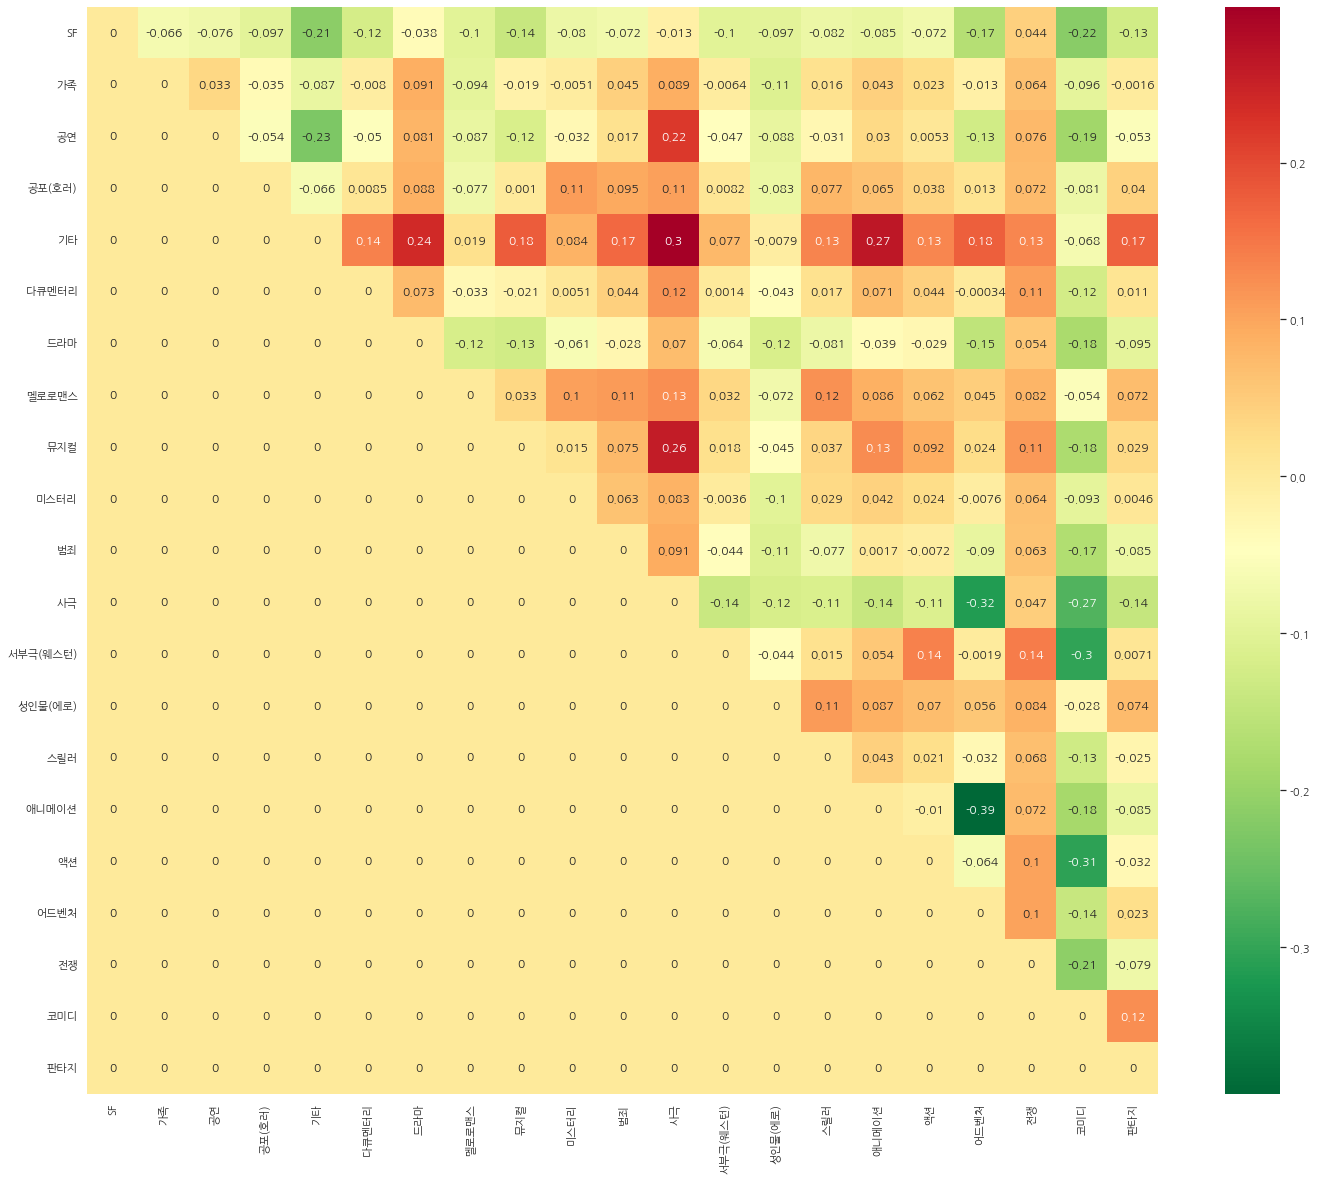

In [170]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 
plt.figure(figsize=(24, 20))
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

WEAT Score 계산 결과, 절댓값의 상한이 0.39로 크지 않았다.

이는 각 장르에서 대표로 선택한 단어가 다른 장르에서 편향을 거의 보이지 않았음을 의미한다.

왜 이런 결과가 발생했을까?

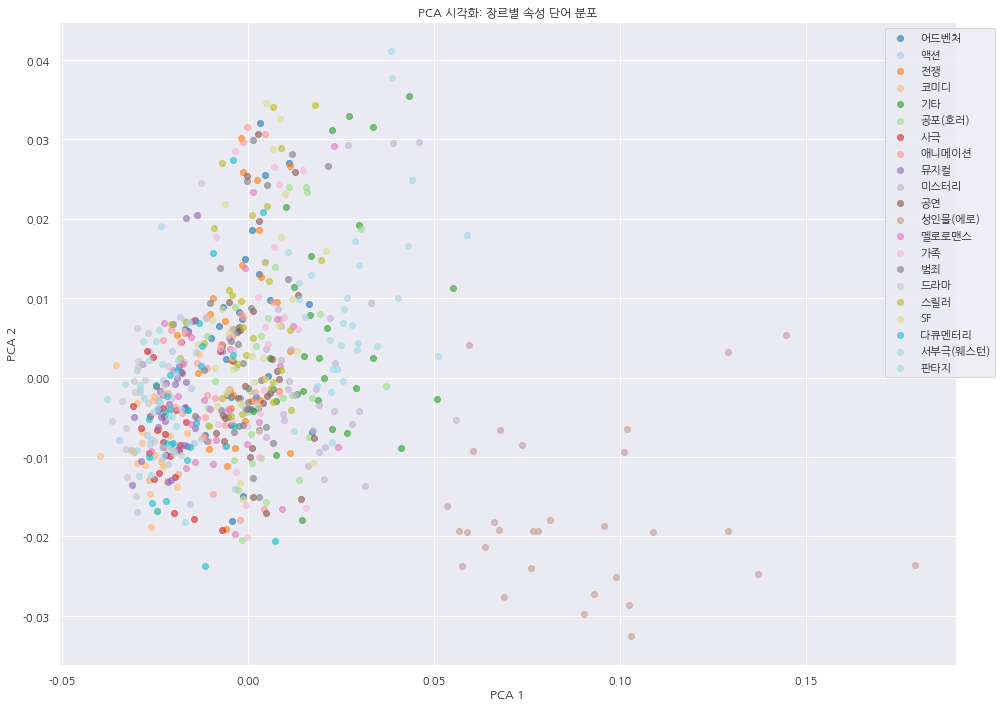

In [181]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# ✅ 1. 전체 속성 단어 벡터 모으기
all_words = []
all_vecs = []
all_labels = []

for i in range(len(attributes)):
    gen_name = genre_name[i]
    model = genre_model_dict[gen_name]
    for word in attributes[i]:
        if word in model.wv:
            all_words.append(word)
            all_vecs.append(model.wv[word])
            all_labels.append(gen_name)

# ✅ 2. PCA로 2D 임베딩
pca = PCA(n_components=2)
reduced = pca.fit_transform(all_vecs)

# ✅ 3. 시각화
plt.figure(figsize=(14, 10))
unique_labels = list(set(all_labels))
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    xs = [reduced[j, 0] for j in range(len(reduced)) if all_labels[j] == label]
    ys = [reduced[j, 1] for j in range(len(reduced)) if all_labels[j] == label]
    plt.scatter(xs, ys, label=label, alpha=0.6, color=color)

plt.title("PCA 시각화: 장르별 속성 단어 분포")
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()


PCA로 속성 단어들을 분석한 결과, 속성 단어들이 PCA 공간에서 서로 잘 섞여있는 양상을 보인다.

이는 특정 장르의 단어가 다른 장르의 단어들과 의미 공간상 명확하게 분리되지 않았음을 의미한다.

단어의 수를 늘리면 어떻게 될까?

In [182]:
n = 100

m1 = X_all[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X_all[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1_, w2_ = [], []
for i in range(300):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 100개 추출한다.
target_art, target_gen = [], []
for i in range(300):
    if (w1_[i] not in w2_) and (w1_[i] in all_model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 100개 추출한다.
for i in range(300):
    if (w2_[i] not in w1_) and (w2_[i] in all_model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [183]:
print("예술 영화:",target_art)
print("일반 영화:",target_gen)

예술 영화: ['연예기획사', '본보기', '투서', '비일', '갤러리', '맥팔레인', '악천후', '삼부작', '테입', '샌디에고', '초롤케', '야심', '폐쇄적', '아동학대', '정면', '치토', '수린', '미시마', '편안함', '취미', '인신공격', '시타', '기계화', '인터내셔널', '베르겐', '폐쇄공간', '파수', '상봉', '동참', '브룸', '납득', '꼬셔', '비관', '무남독녀', '쿄이치', '로베르', '노동절', '깡다구', '깡통', '블랙옥스', '덜렁', '문답', '발사', '김성균', '윤설희', '지폐', '음기', '앙상블', '알폰스', '독방', '전시회', '테리어', '루카', '달래', '사대부', '집시법', '위레파', '밀레', '설리', '숙제', '까치', '퐁텐', '체증', '지방', '가계', '김효진', '이안', '섀도우', '제작', '난사', '매디슨', '경제학자', '티슈', '모더니', '갈리시아', '호기롭', '장비', '송연', '단추', '산기슭', '찬미', '옥집', '감시', '천문학', '마당', '단서', '이윤서', '레기나', '작당', '귀중', '옐레나', '찬가', '분화구', '대혁명', '언쟁', '선원', '트로마', '젠장', '우선', '들락거리']
일반 영화: ['텐트', '참모', '신용', '준우', '차마', '신타로', '원우', '사토루', '아우', '영업일', '젠킨스', '도윤', '브릿지', '다음해', '트렌드', '톰킨스', '참가', '래시', '만일', '록웰', '끌레르몽', '부탄', '베니스영화제', '옥임', '옥자', '양립', '츠보미', '반전', '듀란트', '방관', '법관', '뷰티풀', '피츠버그', '광수', '탄력', '모험가', '지주', '추출', '이해경', '밀항', '베트남', '미관', '트루히요', '구내', '연결고리', '심사', '외교관', '타락', '신도시', 

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm

# 1. TF-IDF 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)
feature_names = vectorizer.get_feature_names_out()

# 2. TF-IDF 인덱스 및 점수 정리
m = [X[i].tocoo() for i in range(X.shape[0])]
w = [[[col, val] for col, val in zip(mm.col, mm.data)] for mm in m]
for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)

# 3. 장르별 속성 단어 선택
attributes = []

for i in range(len(w)):
    gen_name = genre_name[i]
    local_model = genre_model_dict[gen_name]

    # 후보 단어: TF-IDF 상위 단어 중 Word2Vec에 존재하는 것만
    candidate_words = [feature_names[idx] for idx, _ in w[i] if feature_names[idx] in all_model.wv]

    # 단어 벡터 + 중심 벡터 계산
    word_vecs = np.stack([local_model.wv[word] for word in candidate_words])
    center_vec = np.mean(word_vecs, axis=0).reshape(1, -1)

    # 유사도 일괄 계산
    sims = cosine_similarity(word_vecs, center_vec).flatten()

    # 코사인 유사도 기준 상위 100개 선택
    sorted_indices = np.argsort(sims)[::-1]
    selected_words = [candidate_words[idx] for idx in sorted_indices[:n]]

    attributes.append(selected_words)
    print(f"{gen_name}: {', '.join(selected_words)}")


SF: 지구, 미래, 자신, 인간, 친구, 사람, 세계, 인류, 위해, 시작, 사건, 정체, 우주, 세상, 실험, 그녀, 음모, 사실, 사고, 과학자, 살인, 상태, 공격, 도시, 탈출, 전쟁, 발생, 외계, 존재, 아들, 원인, 스타크, 바로, 미국, 능력, 이제, 과연, 누구, 마지막, 사랑, 대결, 개발, 로봇, 영화, 운명, 중심, 요원, 의문, 대한, 죽음, 과거, 발견, 이용, 슈퍼, 니콜, 목숨, 시도, 모두, 비밀, 은밀, 파괴, 토니, 기술, 해결, 아버지, 위협, 특수, 멸망, 한편, 박사, 라임, 우주선, 서서히, 제작, 소유, 아이, 명의, 사망, 도움, 경찰, 데이빗, 방출, 멸종, 누군가, 물리학자, 진화, 중계, 임무, 추적, 수퍼맨, 노엘, 무기, 하나, 기억, 남편, 히노키, 폭발, 생활, 피터슨, 일본
가족: 시작, 영화제, 위해, 가족, 아빠, 마을, 엄마, 그녀, 아들, 자신, 소년, 친구, 사람, 세상, 소녀, 아버지, 아이, 다시, 사랑, 사건, 가장, 엠마, 소식, 할머니, 할아버지, 낙타, 때문, 부인, 다른, 서울, 모두, 파리, 학교, 과연, 마음, 작품, 가득, 간다, 대한, 아내, 위기, 우리, 발견, 도시, 어머니, 회사, 크리스마스, 이자, 결심, 아랍, 국제, 사실, 글렌, 조이, 노동자, 서로, 콜랴, 캡틴, 최고, 속죄, 해나, 타일러, 무엇, 영화, 모험, 가지, 순간, 하루, 테리, 하나, 변신, 조교, 베를린, 한편, 상황, 오락, 여섯, 방학, 디바, 오빠, 부산, 카르멘, 부부, 동구, 낯선, 펠리칸, 사람과, 판타스틱, 미아, 문어, 사이, 혜지, 레시피, 기억, 개발, 선물, 캠프, 갈비, 씨제이, 운영
공연: 그녀, 사랑, 위해, 토스카, 시작, 무대, 여인, 왕자, 사이, 친구, 실황, 사실, 세계, 자신, 모습, 사람, 미노, 도시, 작곡, 결혼, 아이, 연인, 오페라, 반니, 공연, 작품, 올레, 공주, 다른, 베르디, 레오, 절망, 발레, 카바, 공작, 명의, 여자, 음악, 이탈리

In [186]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

X = np.array([all_model.wv[word] for word in target_art])
Y = np.array([all_model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([all_model.wv[word] for word in attributes[i]])
        B = np.array([all_model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

<AxesSubplot:>

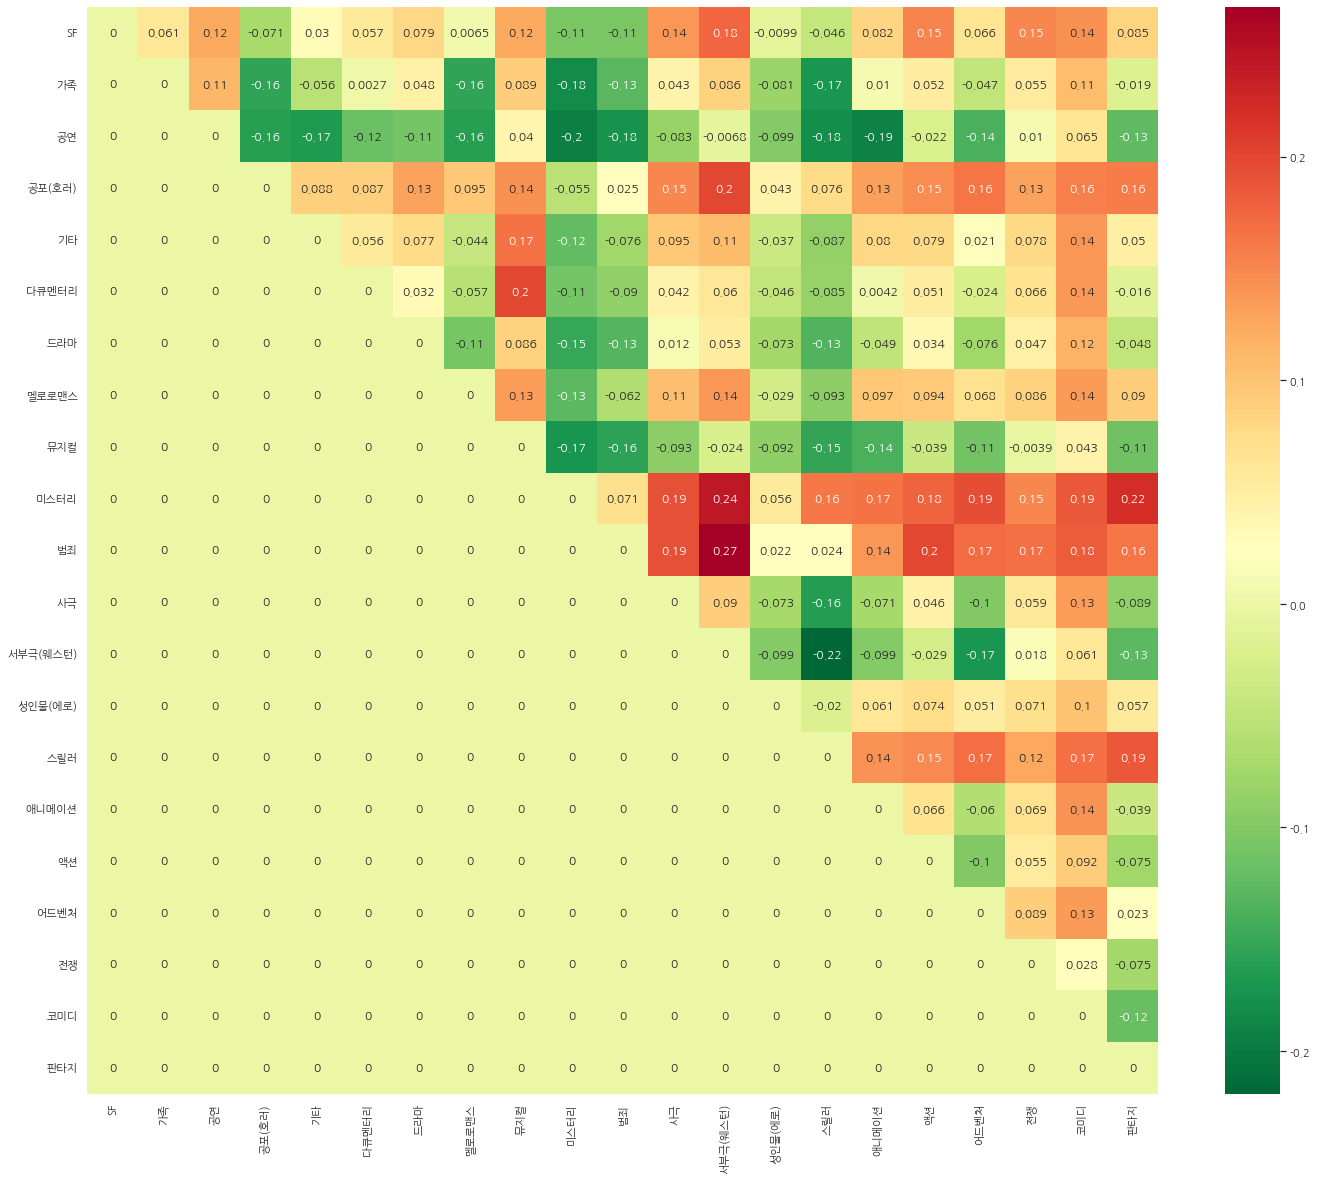

In [187]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 
plt.figure(figsize=(24, 20))
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

단어의 수를 늘렸더니 오히려 WEAT Score의 범위가 줄어들었다.

이번에는 단어 수를 줄여보자.

In [198]:
n = 10

m1 = X_all[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X_all[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1_, w2_ = [], []
for i in range(300):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 10개 추출한다.
target_art, target_gen = [], []
for i in range(300):
    if (w1_[i] not in w2_) and (w1_[i] in all_model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 10개 추출한다.
for i in range(300):
    if (w2_[i] not in w1_) and (w2_[i] in all_model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tqdm import tqdm

# 1. TF-IDF 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)
feature_names = vectorizer.get_feature_names_out()

# 2. TF-IDF 인덱스 및 점수 정리
m = [X[i].tocoo() for i in range(X.shape[0])]
w = [[[col, val] for col, val in zip(mm.col, mm.data)] for mm in m]
for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)

# 3. 장르별 속성 단어 선택
attributes = []

for i in range(len(w)):
    gen_name = genre_name[i]
    local_model = genre_model_dict[gen_name]

    # 후보 단어: TF-IDF 상위 단어 중 Word2Vec에 존재하는 것만
    candidate_words = [feature_names[idx] for idx, _ in w[i] if feature_names[idx] in all_model.wv]

    # 단어 벡터 + 중심 벡터 계산
    word_vecs = np.stack([local_model.wv[word] for word in candidate_words])
    center_vec = np.mean(word_vecs, axis=0).reshape(1, -1)

    # 유사도 일괄 계산
    sims = cosine_similarity(word_vecs, center_vec).flatten()

    # 코사인 유사도 기준 상위 10개 선택
    sorted_indices = np.argsort(sims)[::-1]
    selected_words = [candidate_words[idx] for idx in sorted_indices[:n]]

    attributes.append(selected_words)
    print(f"{gen_name}: {', '.join(selected_words)}")


SF: 지구, 미래, 자신, 인간, 친구, 사람, 세계, 인류, 위해, 시작
가족: 시작, 영화제, 위해, 가족, 아빠, 마을, 엄마, 그녀, 아들, 자신
공연: 그녀, 사랑, 위해, 토스카, 시작, 무대, 여인, 왕자, 사이, 친구
공포(호러): 그녀, 발견, 좀비, 자신, 사람, 죽음, 시작, 사건, 모든, 위해
기타: 사람, 영화제, 그녀, 국제, 여성, 위해, 아이, 엄마, 연출, 우리
다큐멘터리: 다큐멘터리, 작품, 대한, 통해, 숙부, 주지, 심혈, 축구팀, 영화제, 하나
드라마: 아이, 사람, 극성, 무성의, 유품, 좌천, 뒷모습, 슈만, 베레, 추장
멜로로맨스: 그녀, 사랑, 사람, 자신, 다시, 남자, 남편, 마음, 서로, 모습
뮤지컬: 로저, 사건, 영화제, 맞이, 재회, 매치, 서로, 발견, 마법, 이미지
미스터리: 사건, 자신, 시작, 위해, 사람, 그녀, 사고, 사실, 발견, 아내
범죄: 자신, 미국, 경찰, 사건, 그녀, 프랭크, 시작, 발견, 위해, 동료
사극: 진심, 전도연, 암살, 한밤, 고산, 목숨, 주인공, 메리, 신기전, 그녀
서부극(웨스턴): 태운, 추적자, 모스, 변화, 무법자, 개척, 레즈, 국제, 하자, 남자
성인물(에로): 그녀, 위해, 남편, 자신, 사랑, 마음, 정사, 다시, 섹스, 관계
스릴러: 자신, 친구, 위해, 남편, 영화제, 시작, 그녀, 발견, 살인, 형사
애니메이션: 시작, 애니메이션, 세상, 인간, 지구, 통해, 발견, 과연, 영화제, 세계
액션: 위해, 살해, 경천, 비난, 그랜드, 윌리, 무역, 강도, 범죄, 사무소
어드벤처: 위해, 세계, 사람, 자신, 친구, 시작, 마을, 인간, 여행, 비밀
전쟁: 시작, 전쟁, 공격, 위해, 부대, 나치, 작전, 독일군, 임무, 대원
코미디: 이안, 결실, 서자, 보고타, 트렌트, 중지, 이미지, 실루엣, 김하늘, 조선
판타지: 그녀, 자신, 사랑, 위해, 시작, 아이, 사람, 이야기, 남자, 과거


In [200]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

X = np.array([all_model.wv[word] for word in target_art])
Y = np.array([all_model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([all_model.wv[word] for word in attributes[i]])
        B = np.array([all_model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

<AxesSubplot:>

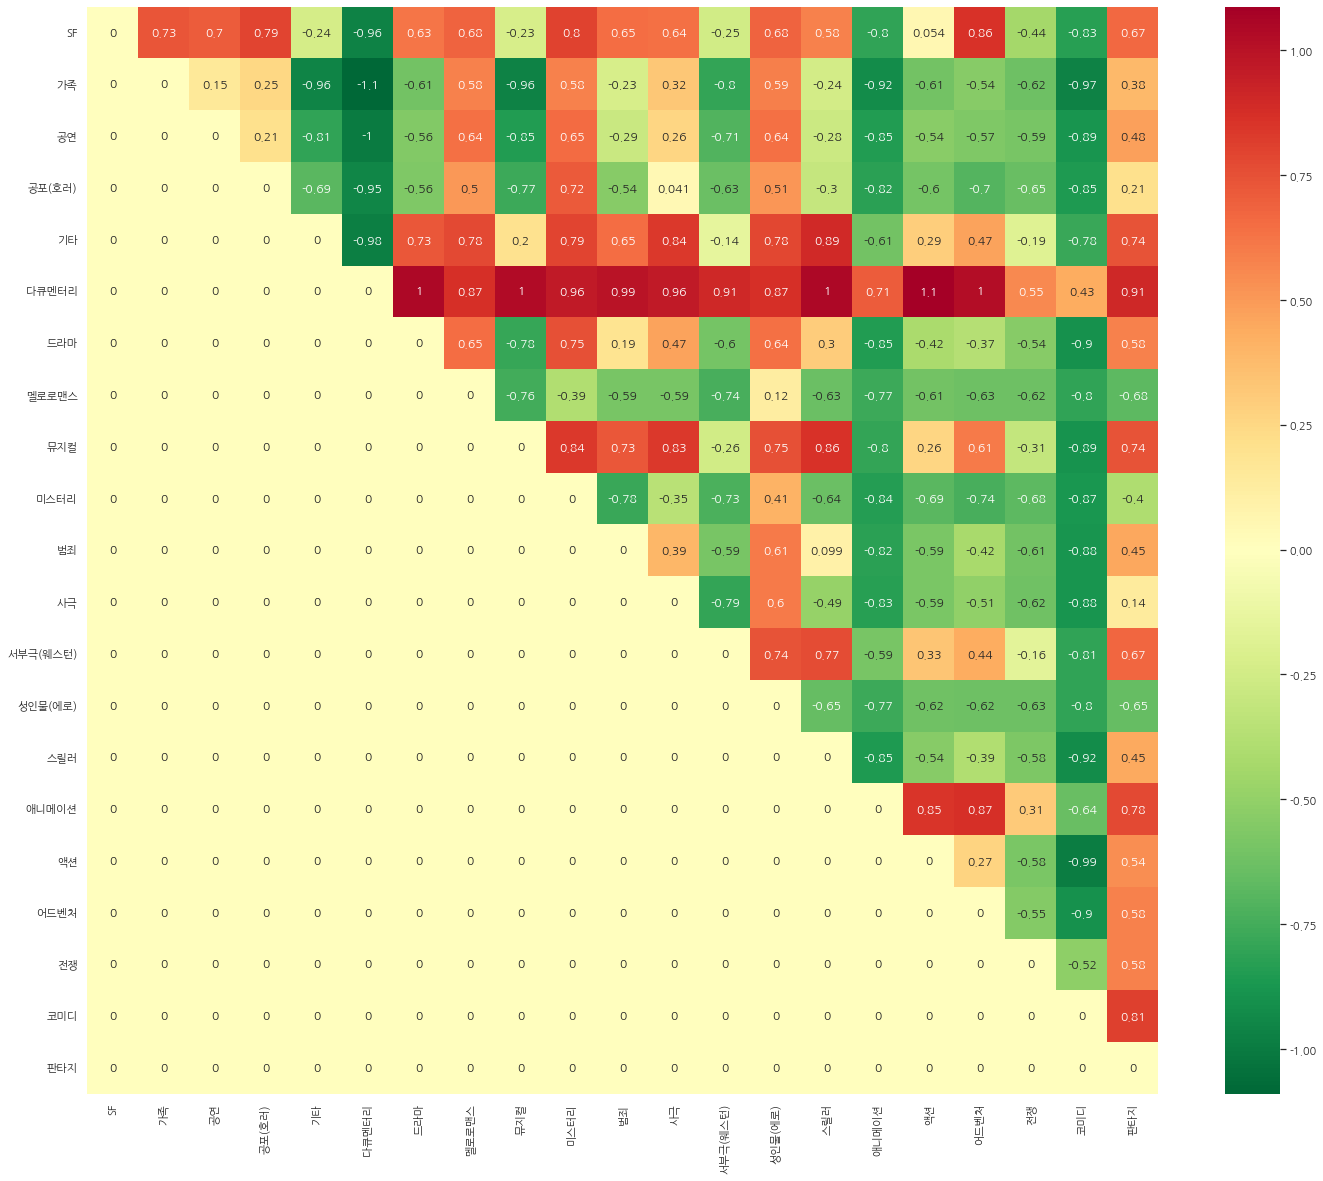

In [201]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 
plt.figure(figsize=(24, 20))
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

단어 수를 줄였더니 WEAT Score의 절댓값이 커졌다.

단어의 수가 많을수록 모호하거나 보편적인 단어가 포함될 가능성이 커졌기 때문에

선택된 소수 단어로 편향성을 설명하는 게 더 쉬운 것으로 생각된다.


---


결과를 분석해보면, 예술영화는 다른 장르들보다도 다큐멘터리를 향한 편향이 매우 큼을 알 수 있다.
반대로, 일반영화는 다른 장르들보다도 코미디와 애니메이션 쪽에 더 편향이 큼을 알 수 있었다.

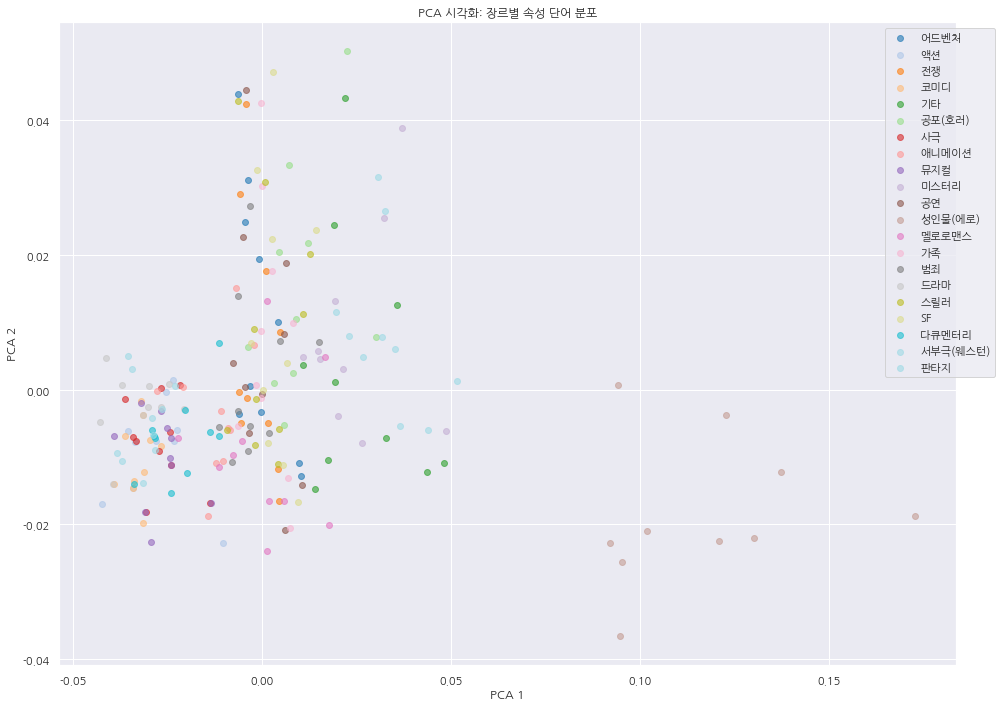

In [202]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# ✅ 1. 전체 속성 단어 벡터 모으기
all_words = []
all_vecs = []
all_labels = []

for i in range(len(attributes)):
    gen_name = genre_name[i]
    model = genre_model_dict[gen_name]
    for word in attributes[i]:
        if word in model.wv:
            all_words.append(word)
            all_vecs.append(model.wv[word])
            all_labels.append(gen_name)

# ✅ 2. PCA로 2D 임베딩
pca = PCA(n_components=2)
reduced = pca.fit_transform(all_vecs)

# ✅ 3. 시각화
plt.figure(figsize=(14, 10))
unique_labels = list(set(all_labels))
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    xs = [reduced[j, 0] for j in range(len(reduced)) if all_labels[j] == label]
    ys = [reduced[j, 1] for j in range(len(reduced)) if all_labels[j] == label]
    plt.scatter(xs, ys, label=label, alpha=0.6, color=color)

plt.title("PCA 시각화: 장르별 속성 단어 분포")
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()


아래는 단어들이 w2v 모델에서 어떻게 분포되어있는지를 확인하는 시각화이다.

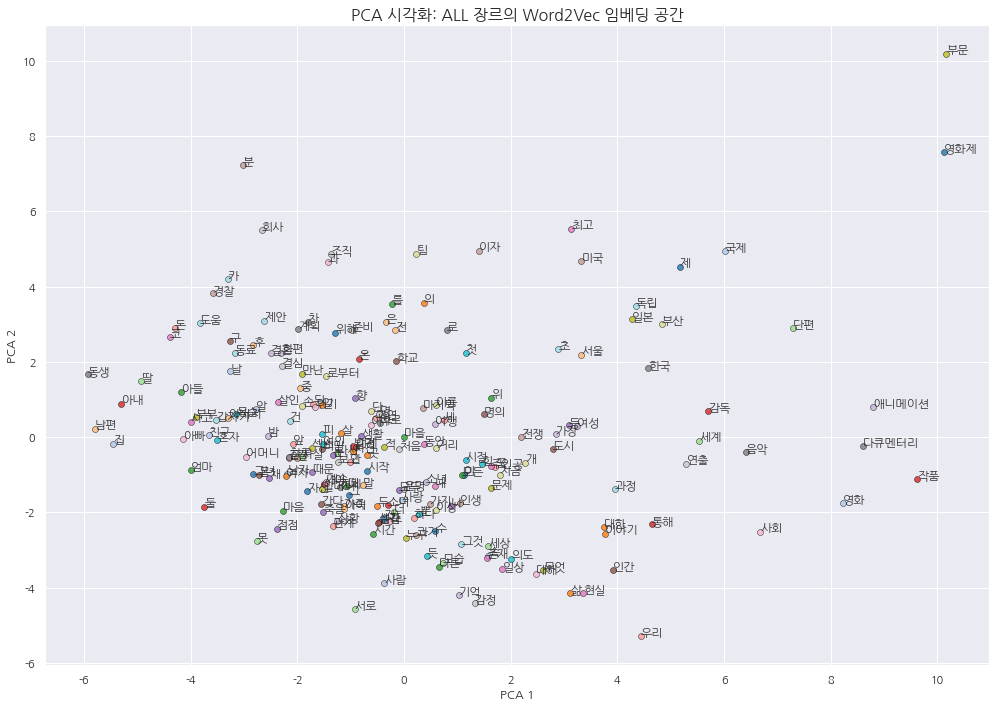

In [203]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# ✅ 1. 시각화할 장르 선택
gen_name = "ALL"  # 예: SF 장르

# ✅ 2. 주요 단어 추출 (상위 200개 또는 전체 중 일부)
vocab = list(all_model.wv.key_to_index.keys())[:200]  # 또는 전체 단어에서 추출
vectors = np.stack([all_model.wv[word] for word in vocab])

# ✅ 3. PCA 2D 투영
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# 색상 지정 (Set2는 밝고 부드러운 색상 계열)
colors = plt.cm.get_cmap('tab20', len(vocab))

# ✅ 4. 시각화
plt.figure(figsize=(14, 10))
for i, word in enumerate(vocab):
    plt.scatter(reduced[i, 0], reduced[i, 1], color=colors(i), alpha=0.8, edgecolors='black', linewidths=0.5)
    plt.text(reduced[i, 0], reduced[i, 1], word, fontsize=12, alpha=0.9)

plt.title(f"PCA 시각화: {gen_name} 장르의 Word2Vec 임베딩 공간", fontsize=16)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()


회고

---

장르별 속성 단어를 추출해 WEAT를 구현하여 계산하는 과정에서
속성 단어 수가 WEAT 결과에 어떤 영향을 주는지 확인해보았다.

장르별 의미 중심성과 유사한 단어들을 선택하는 방식으로 진행했는데,
속성 단어가 너무 적기 때문에 장르별 구별을 잘 못한걸까? 라는 의문 아래
속성 단어를 늘려 중심에서 멀리 떨어진 단어들도 선택해봤지만 구별력이 오히려 약해졌다.

결국, 속성 단어 수를 줄였을 때 WEAT Score가 정상적인 분포를 보임을 확인했고,
의미적으로 대표성이 높은 소수의 단어가 오히려 편향 탐지에 효과적임을 확인하였다.